In [21]:
from tensorflow.compat.v1.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

ModuleNotFoundError: No module named 'tensorflow.compat.v1.examples'

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
# from tensorflow.examples.tutorials.mnist import input_data

(train_images, train_labels), (test_images, test_labels) =  tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
import numpy as np
from keras import models
from keras import layers
from keras import initializers

Using TensorFlow backend.


In [8]:
weight_sgd={
    'h1' : tf.Variable(tf.random_normal([784, 512]),stddev=0.039),
    'h2' : tf.Variable(tf.random_normal([512, 128]),stddev=0.129),
    'out' : tf.Variable(tf.random_normal([128, 10]),stddev=0.129),
}


AttributeError: module 'tensorflow' has no attribute 'random_normal'

In [6]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [7]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [7]:
from keras.utils import to_categorical

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 40s 671us/step - loss: 0.2521 - accuracy: 0.9272
Epoch 2/5
60000/60000 [==============================] - 37s 618us/step - loss: 0.1028 - accuracy: 0.9704
Epoch 3/5
60000/60000 [==============================] - 38s 626us/step - loss: 0.0675 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 38s 637us/step - loss: 0.0484 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 34s 573us/step - loss: 0.0365 - accuracy: 0.9891


In [15]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

print('Test acc: ', test_acc)

10000/10000 [==============================] - 25s 2ms/step
Test acc:  0.9800999760627747


In [16]:
print(train_images.ndim)

2


In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(32))

Using TensorFlow backend.


In [18]:
print(train_images.ndim)

3


In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 7s 4us/step


In [9]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 331208600991613021
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4272414250062090005
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3133590732
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17014528742294590963
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6935204881394231483
physical_device_desc: "device: XLA_GPU device"
]


In [9]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

NameError: name 'model' is not defined

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 509us/step - loss: 0.0097 - acc: 0.9974 - val_loss: 0.7531 - val_acc: 0.8644
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 0.7760 - val_acc: 0.8642
Epoch 3/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.0083 - acc: 0.9973 - val_loss: 0.8220 - val_acc: 0.8615
Epoch 4/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8376 - val_acc: 0.8619
Epoch 5/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.8824 - val_acc: 0.8619
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.0057 - acc: 0.9983 - val_loss: 0.9202 - val_acc: 0.8609
Epoch 7/20
15000/15000 [==============================] - 2s 143us/step - loss: 7.7194e-04 - acc: 1.0000 - val_loss: 0.939

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [26]:
import matplotlib.pyplot as plt

In [35]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [36]:
epochs = range(1,len(history_dict['acc'])+1)

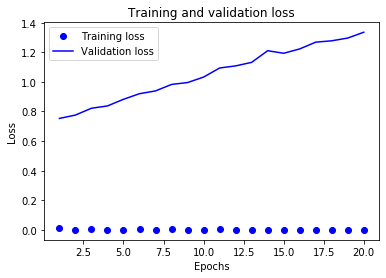

In [37]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

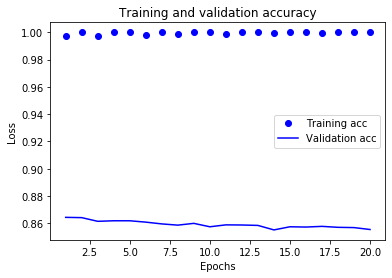

In [39]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 6s 222us/step - loss: 0.4503 - accuracy: 0.8217
Epoch 2/4
25000/25000 [==============================] - 4s 180us/step - loss: 0.2549 - accuracy: 0.9110
Epoch 3/4
25000/25000 [==============================] - 5s 182us/step - loss: 0.1977 - accuracy: 0.9291
Epoch 4/4
25000/25000 [==============================] - 5s 180us/step - loss: 0.1633 - accuracy: 0.9429


In [42]:
results = model.evaluate(x_test, y_test)

print(results)

25000/25000 [==============================] - 38s 2ms/step
[0.3055716895866394, 0.8798800110816956]


In [43]:
model.predict(x_test)

array([[0.16666031],
       [0.99997747],
       [0.9671308 ],
       ...,
       [0.16108333],
       [0.10002235],
       [0.74492896]], dtype=float32)